In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:

data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df = data.copy()

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [25]:
df.shape

(2111, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

```Gender - gender of the individual - object - ['Female', 'Male']
Age - age of the individual - float
Height - Height of the individual - float 
Weight - Weight of the individual - float
family_history_with_overweight - whether the individual has a family history of overweight - object - ['yes', 'no']
FAVC - Frequent consumption of high-caloric food - object - ['no', 'yes']                 
FCVC - Frequency of consumption of vegetables. - float
NCP - Number of main meals per day. - float                     
CAEC - Consumption of food between meals - object - ['Sometimes', 'Frequently', 'Always', 'no']                   
SMOKE - smoking habbit - object - ['no', 'yes']       
CH2O - Daily consumption of water in liters. - float                
SCC - Calories consumption monitoring (practice of tracking or monitoring the number of calories consumed by an individual as part of their daily dietary intake. ) - ['no', 'yes']              
FAF - Physical activity frequency. (It indicates how often someone participates in physical exercise or movement-based activities as part of their daily or weekly routine.) - float
TUE - Time using technology devices per day - float
CALC - Consumption of alcohol - object - ['no', 'Sometimes', 'Frequently', 'Always']
MTRANS - Mode of transportation used - object - ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']   
NObeyesdad - The target variable representing the obesity level of the individual. - object - ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']```

In [18]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [20]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

- there are no null values in the dataset

In [24]:
#check for duplicates
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [27]:
print(len(df[df.duplicated()]))
#there are around 24 duplicate rows and will drop those
df = df.drop_duplicates()

24


In [28]:
print(len(df[df.duplicated()])) #dropped all the duplicates

0


In [31]:
##categorical columns
df['Gender'].value_counts()

Male      1052
Female    1035
Name: Gender, dtype: int64

Observation:

    - there are almost equal number of male and females therefore the dataset is not baised based on the gender



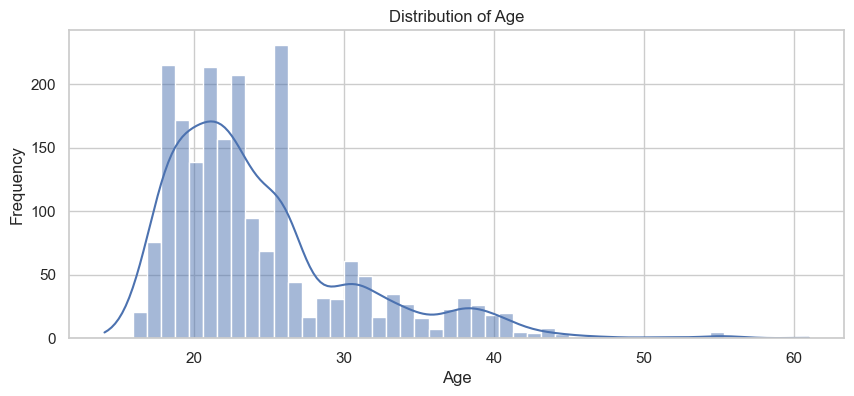

In [60]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='Age', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Observation:

    - the majority of the individuals falls under the group 18 - 30


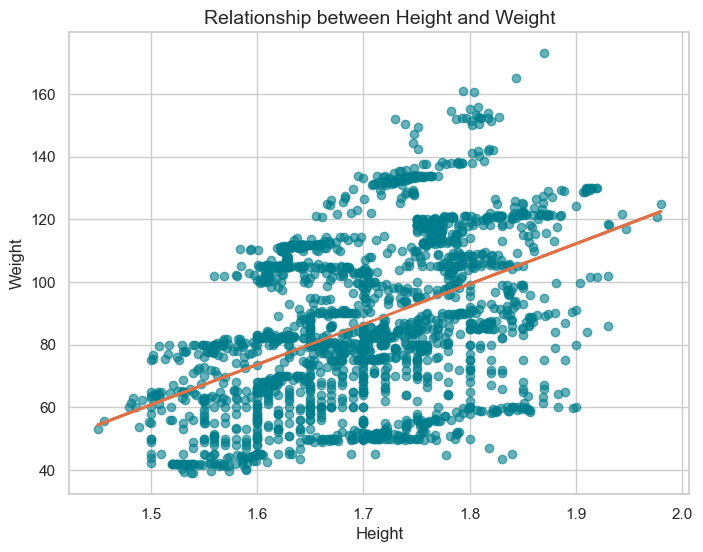

In [66]:
import matplotlib.pyplot as plt

coefficients = np.polyfit(df['Height'], df['Weight'], 1)
poly_func = np.poly1d(coefficients)
best_fit_line = poly_func(df['Height'])

plt.figure(figsize=(8, 6))  
plt.scatter(df['Height'], df['Weight'], color='#007D8C', alpha=0.6)
plt.plot(df['Height'], best_fit_line, color='#E07146', linewidth=2, label='Best Fit Line')

plt.xlabel('Height', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.title('Relationship between Height and Weight', fontsize=14)

plt.tick_params(axis='both', which='both', bottom=False, left=False)

plt.show()


Observation:

    - height and weight are directly proportional to each other
    - there are some outliers but majority are following the relationship

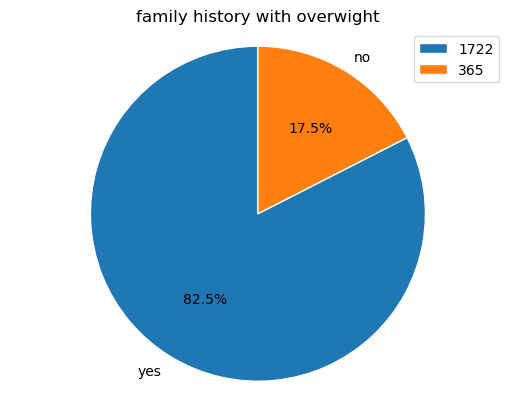

In [51]:
# sns.displot(data=df, x='family_history_with_overweight')
plt.pie(x=df['family_history_with_overweight'].value_counts(),
        labels=df['family_history_with_overweight'].value_counts().index, autopct='%1.1f%%',
        startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('family history with overwight')
plt.axis('equal')
plt.legend(df['family_history_with_overweight'].value_counts(), loc='best')
plt.show()

Observation

    - there are only (17.5%) individuals who is not having any family background for obesity

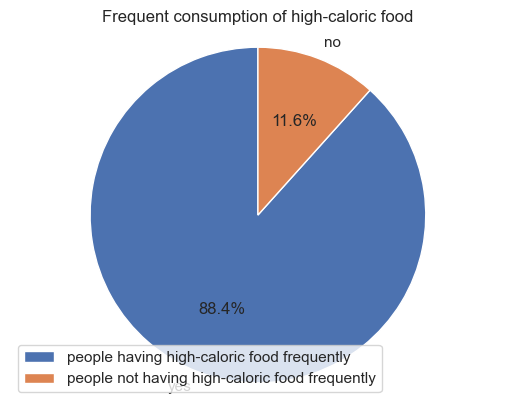

In [73]:
# sns.displot(data=df, x='family_history_with_overweight')
plt.pie(x=df['FAVC'].value_counts(),
        labels=df['family_history_with_overweight'].value_counts().index, autopct='%1.1f%%',
        startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('Frequent consumption of high-caloric food')
plt.axis('equal')
plt.legend(['people having high-caloric food frequently', 'people not having high-caloric food frequently'], loc='best')
plt.show()

Observation
    
    - lot of individuals have high caloric food frequently 


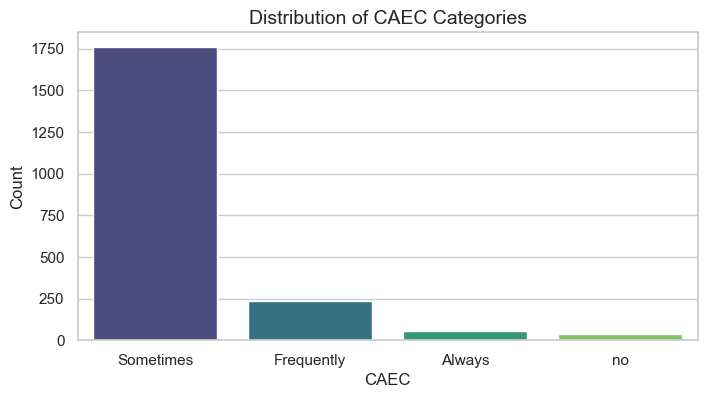

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

caec_data = df['CAEC']

category_counts = caec_data.value_counts()

plt.figure(figsize=(8, 4))  
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

plt.xlabel('CAEC', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CAEC Categories', fontsize=14)
plt.show()


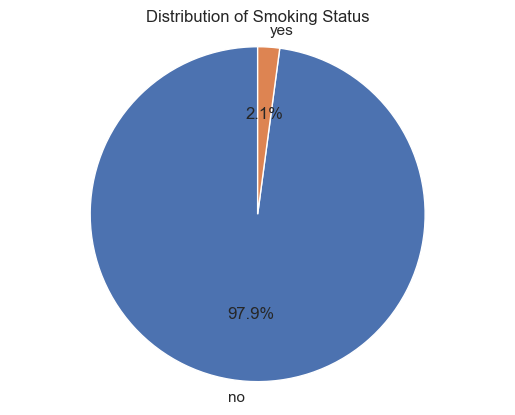

In [82]:
# sns.displot(data=df, x='family_history_with_overweight')
plt.pie(x=df['SMOKE'].value_counts(),
        labels=df['SMOKE'].value_counts().index, autopct='%1.1f%%',
        startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('Distribution of Smoking Status')
plt.axis('equal')
plt.show()

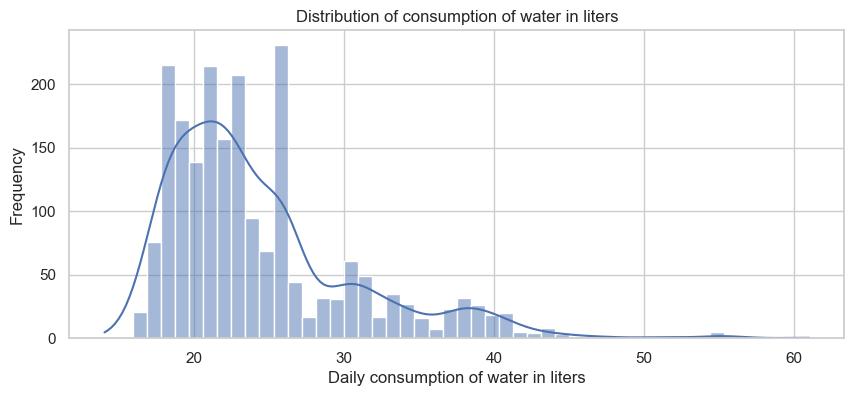

In [83]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='Age', kde=True)
plt.xlabel('Daily consumption of water in liters')
plt.ylabel('Frequency')
plt.title('Distribution of consumption of water in liters')
plt.show()

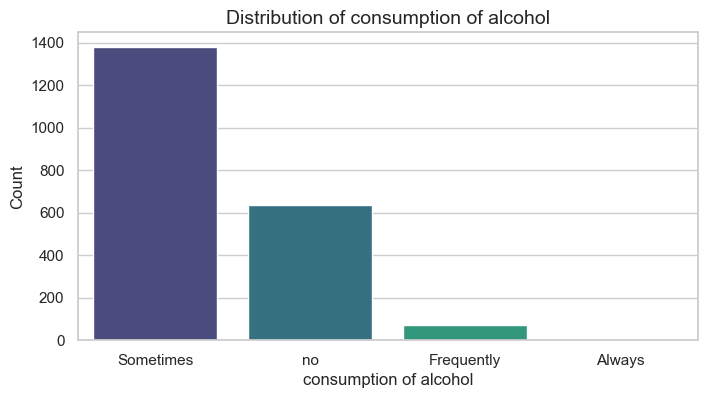

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 4))  
sns.barplot(x=df['CALC'].value_counts().index, y=df['CALC'].value_counts().values, palette='viridis')

plt.xlabel('consumption of alcohol', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of consumption of alcohol', fontsize=14)
plt.show()


Observation:

    - majority of individuals consume alcohol sometimes then the people who don't

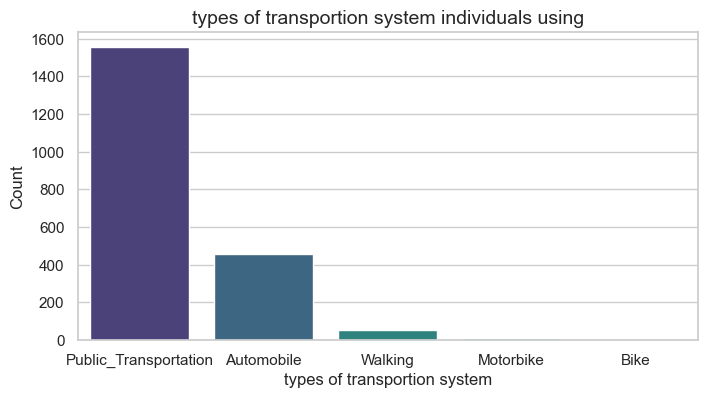

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 4))  
sns.barplot(x=df['MTRANS'].value_counts().index, y=df['MTRANS'].value_counts().values, palette='viridis')

plt.xlabel('types of transportion system', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('types of transportion system individuals using', fontsize=14)
plt.show()


Observation:

    - majority of individuals use public transpotation
    - least number of individuals use Bike 

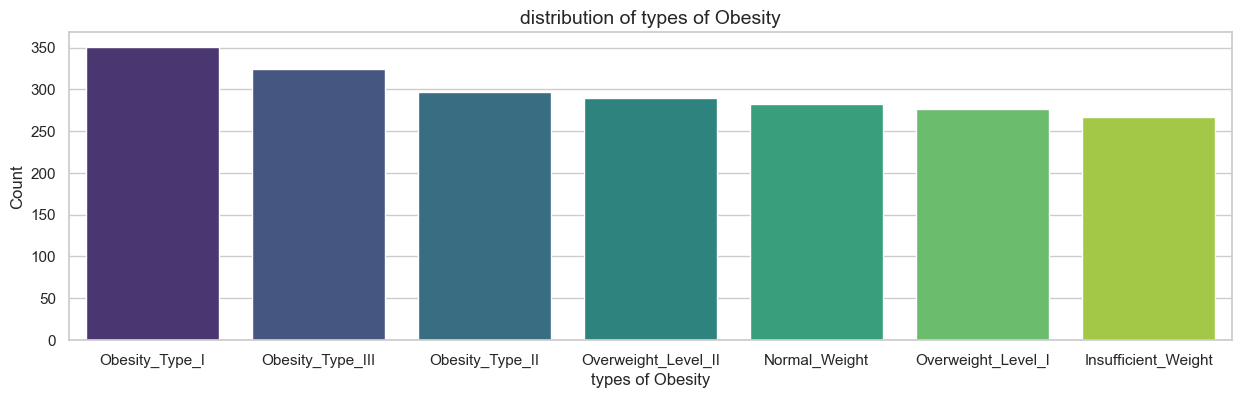

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 4))  
sns.barplot(x=df['NObeyesdad'].value_counts().index, y=df['NObeyesdad'].value_counts().values, palette='viridis')

plt.xlabel('types of Obesity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('distribution of types of Obesity', fontsize=14)
plt.show()


In [ ]:
#### relationship between 

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

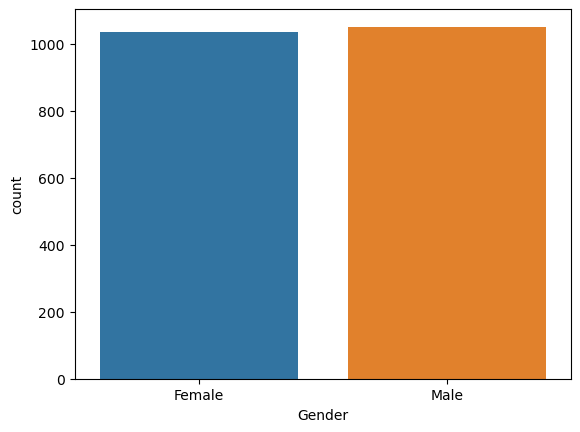

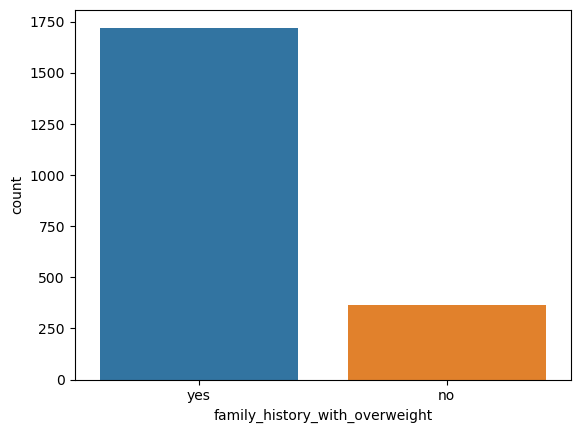

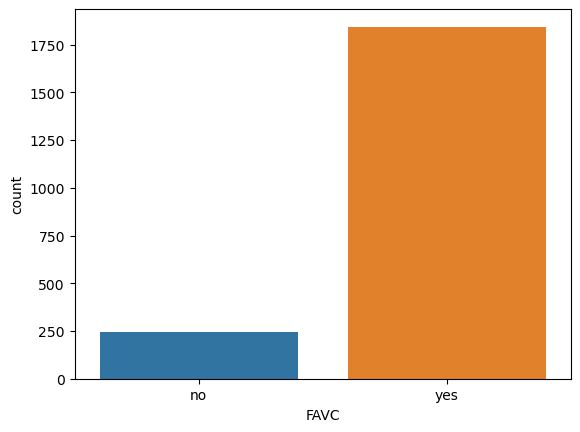

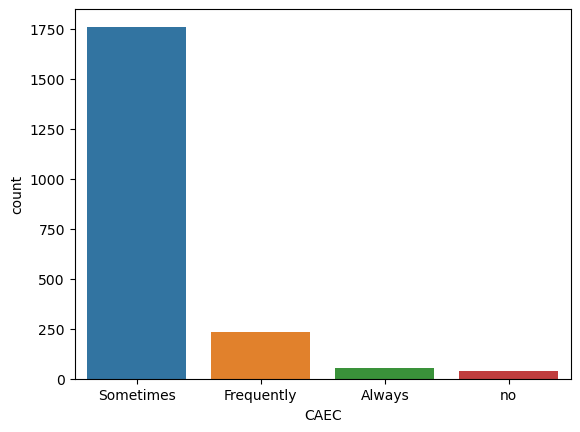

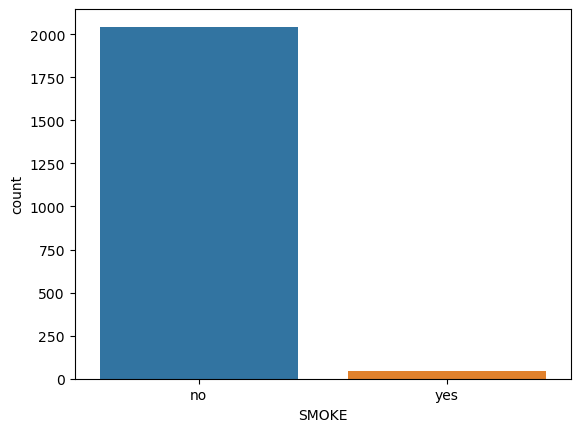

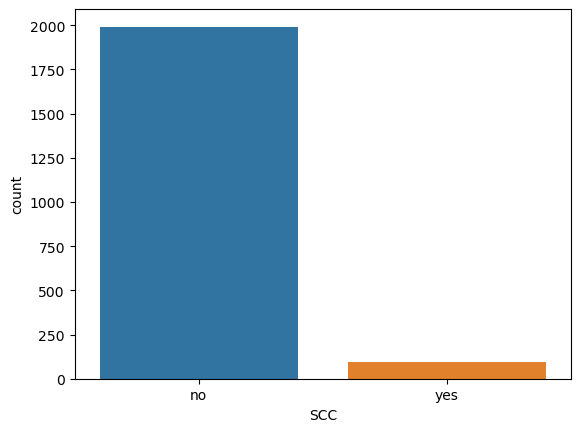

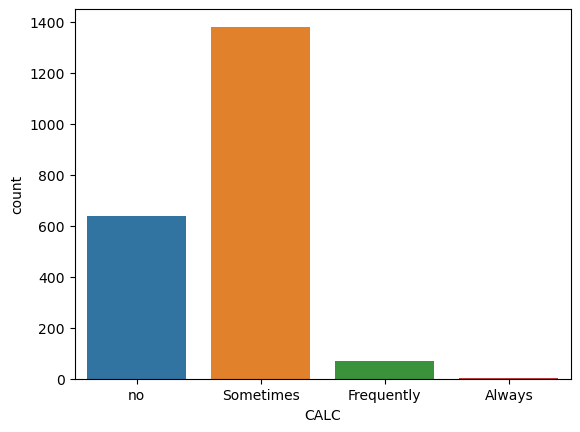

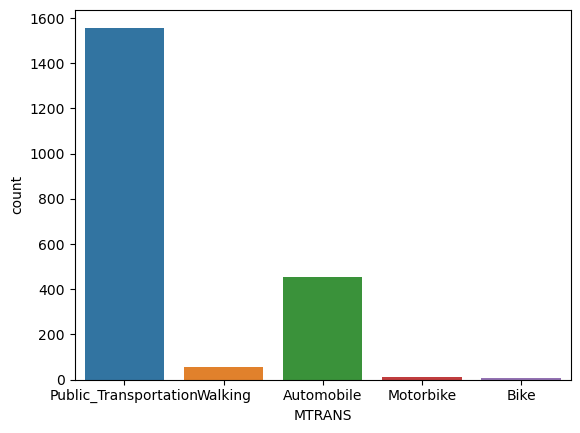

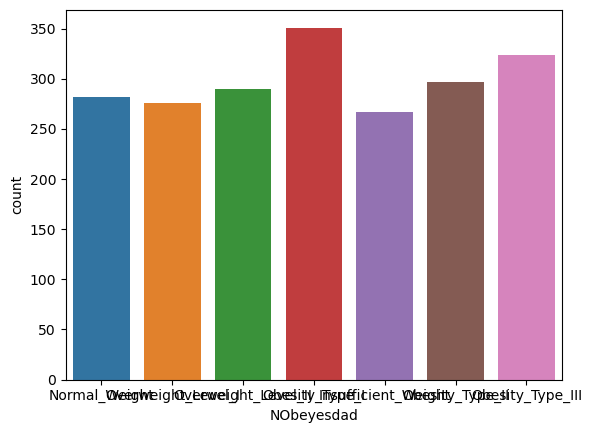

In [30]:
categorical_columns = df.select_dtypes(include='object').columns
import seaborn as sns
import matplotlib.pyplot as plt
for column_name in categorical_columns:
    sns.countplot(data=df, x=column_name)
    plt.show()